In [1]:
# Import the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# loading the dataset to pandas dataframe
big_smart_data = pd.read_csv('./Train.csv')

In [3]:
big_smart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_smart_data.shape

(8523, 12)

In [5]:
# getting some information about the dataset
big_smart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type  
- Outlet_Type 

In [6]:
# checking for missing values
big_smart_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values </br>
- Mean --> Avarage value
- Mode --> Most repeated value

In [7]:
# mean value of "Item weight" column
big_smart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
# fill missing value in 'Item_Weight' column with 'Mean' value
big_smart_data['Item_Weight'].fillna(big_smart_data['Item_Weight'].mean(), inplace=True)

In [9]:
big_smart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# fill the missing value in 'Outlet_Size' with mode
mode_of_outlet_size = big_smart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [19]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [20]:
missing_value = big_smart_data['Outlet_Size'].isnull()

In [21]:
print(missing_value)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [33]:
# print(mode_of_outlet_size['Grocery Store'])
# mode_of_outlet_size['Supermarket Type2']
big_smart_data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

,Outlet_Size
3,Small
8,Small
9,Small
25,Small
28,Small
...,...
8502,Small
8508,Small
8509,Small
8514,Small


In [35]:
big_smart_data.loc[missing_value, 'Outlet_Size'] = big_smart_data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [36]:
big_smart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data analysis

In [37]:
big_smart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [38]:
sns.set()

<Figure size 432x432 with 0 Axes>

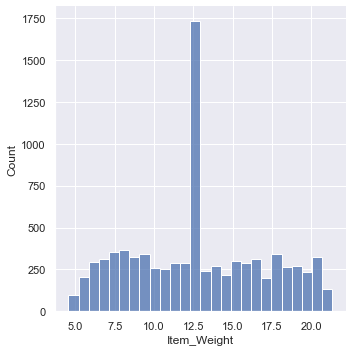

In [39]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.displot(big_smart_data['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

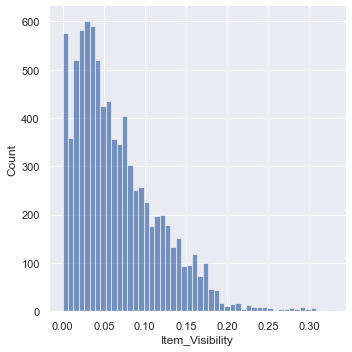

In [40]:
# Item_Visibility distribution
plt.figure(figsize=(6, 6))
sns.displot(big_smart_data['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

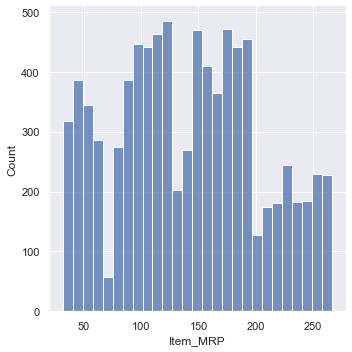

In [42]:
# Item_MRP distribution
plt.figure(figsize=(6, 6))
sns.displot(big_smart_data['Item_MRP'])
plt.show()

Categorical features

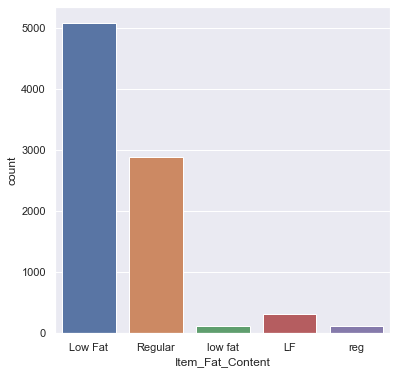

In [44]:
# Item_Fat_Content column
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=big_smart_data)
plt.show()

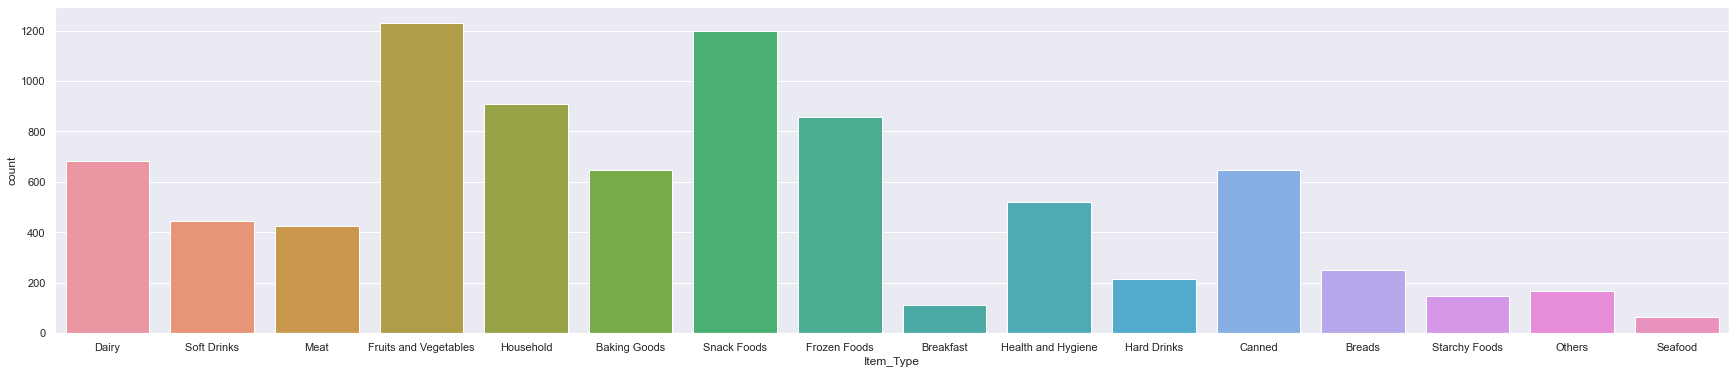

In [48]:
# Item_Type Column
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=big_smart_data)
plt.show()

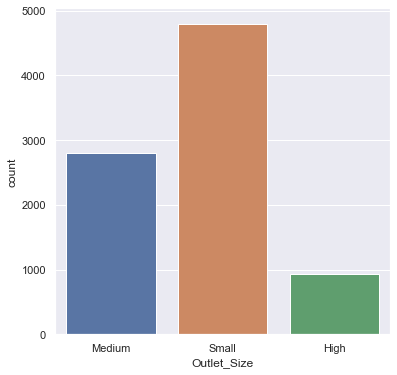

In [49]:
# Outlet_Size Column
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=big_smart_data)
plt.show()

Data Pre-processing

In [53]:
big_smart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [52]:
big_smart_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

Label Encoding

In [54]:
encoder = LabelEncoder()

In [57]:
big_smart_data['Item_Identifier'] = encoder.fit_transform(big_smart_data['Item_Identifier'])
big_smart_data['Item_Fat_Content'] = encoder.fit_transform(big_smart_data['Item_Fat_Content'])
big_smart_data['Item_Type'] = encoder.fit_transform(big_smart_data['Item_Type'])
big_smart_data['Outlet_Identifier'] = encoder.fit_transform(big_smart_data['Outlet_Identifier'])
big_smart_data['Outlet_Size'] = encoder.fit_transform(big_smart_data['Outlet_Size'])
big_smart_data['Outlet_Type'] = encoder.fit_transform(big_smart_data['Outlet_Type'])
big_smart_data['Outlet_Location_Type'] = encoder.fit_transform(big_smart_data['Outlet_Location_Type'])

In [58]:
big_smart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [59]:
X = big_smart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_smart_data['Item_Outlet_Sales']

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training

In [61]:
# XGBoost Regressor
regressor = XGBRegressor()

In [62]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [63]:
# Evaluation
training_data_prediction = regressor.predict(X_train)

In [64]:
# R squared value
r2_train_error = metrics.r2_score(Y_train, training_data_prediction)

In [65]:
print("R squared value: ", r2_train_error)

R squared value:  0.8639680373364909


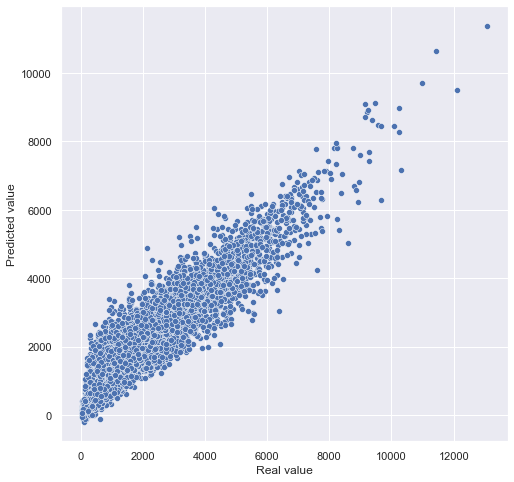

In [67]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=Y_train, y=training_data_prediction)
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.show()

In [68]:
test_data_prediction = regressor.predict(X_test)

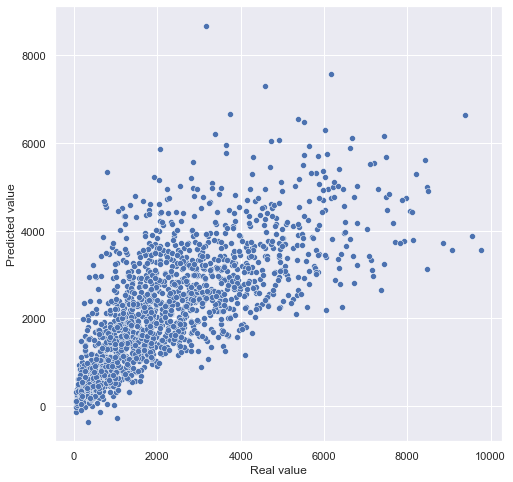

In [69]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.show()